# Generative Adversarial Network

## Setup of useful functions
In this first part of the notebook we import all of what is needed and we define useful functions to handle data.

In [1]:
import tensorflow as tf
import numpy as np
from IPython.display import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2

from models import *
from useful import *

tf.reset_default_graph()

## Training a model full MLP
You can train a model and change the parameters by running these two cell.

In [2]:
#Parameters-----------------------------------------
batch_size = 125
male = False
size_dataset = 5000 #Can't be more than 1000 here
number_iter = 3000
#===================================================
tf.reset_default_graph()
#Placeholders
X = tf.placeholder(tf.float32,[None,64,64,3])
Z = tf.placeholder(tf.float32,[None,60])

#Model
X_fake = generator_mlp(Z)
true_data_logits = discriminator_mlp(X)
fake_data_logits = discriminator_mlp(X_fake, reuse=True)

#Loss functions
D_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=true_data_logits,labels=tf.ones_like(true_data_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_data_logits,labels=tf.zeros_like(fake_data_logits)))
G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_data_logits,labels=tf.ones_like(fake_data_logits)))

#Optimizers
G_variables = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="Generator")
D_variables = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="Discriminator")
G_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(G_loss,var_list = G_variables) # G Train step
D_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(D_loss,var_list = D_variables) # D Train step

In [5]:
sess = tf.Session()
print("initializing variables...")
tf.global_variables_initializer().run(session=sess)
print("variable initialization done")

print("Loading data...")
dataset = get_data(size_dataset, male)
print("Data loaded. Number of images: " + str(len(dataset)))

for i in range(number_iter):
    X_batch = get_batch(batch_size, dataset)
    Z_batch = sample_Z(batch_size, 60)
    _, Dloss = sess.run([D_step, D_loss], feed_dict={X: X_batch, Z: Z_batch})
    _, Gloss = sess.run([G_step, G_loss], feed_dict={Z: Z_batch})

    print("N: %d\t D_loss: %.4f\t G_loss: %.4f"%(i,Dloss,Gloss))

initializing variables...
variable initialization done
Loading data...
Data loaded. Number of images: 5000
Data loaded. Number of images: 5000
N: 0	 D_loss: 2.0793	 G_loss: 0.7073
N: 1	 D_loss: 1.6750	 G_loss: 0.7078
N: 2	 D_loss: 1.3612	 G_loss: 0.7069
N: 3	 D_loss: 1.1538	 G_loss: 0.7083
N: 4	 D_loss: 1.0361	 G_loss: 0.7067
N: 5	 D_loss: 0.9577	 G_loss: 0.7080
N: 6	 D_loss: 0.9153	 G_loss: 0.7076
N: 7	 D_loss: 0.8734	 G_loss: 0.7080
N: 8	 D_loss: 0.8429	 G_loss: 0.7086
N: 9	 D_loss: 0.8293	 G_loss: 0.7086
N: 10	 D_loss: 0.8155	 G_loss: 0.7076
N: 11	 D_loss: 0.7970	 G_loss: 0.7089
N: 12	 D_loss: 0.7899	 G_loss: 0.7103
N: 13	 D_loss: 0.7764	 G_loss: 0.7110
N: 14	 D_loss: 0.7614	 G_loss: 0.7143
N: 15	 D_loss: 0.7515	 G_loss: 0.7147
N: 16	 D_loss: 0.7402	 G_loss: 0.7150
N: 17	 D_loss: 0.7410	 G_loss: 0.7166
N: 18	 D_loss: 0.7415	 G_loss: 0.7146
N: 19	 D_loss: 0.7352	 G_loss: 0.7168
N: 20	 D_loss: 0.7197	 G_loss: 0.7178
N: 21	 D_loss: 0.7228	 G_loss: 0.7201
N: 22	 D_loss: 0.7147	 G_loss: 

N: 209	 D_loss: 2.8032	 G_loss: 0.0002
N: 210	 D_loss: 10.1195	 G_loss: 0.0022
N: 211	 D_loss: 7.1594	 G_loss: 0.0114
N: 212	 D_loss: 5.0681	 G_loss: 0.0558
N: 213	 D_loss: 3.5851	 G_loss: 0.2508
N: 214	 D_loss: 2.2755	 G_loss: 1.3045
N: 215	 D_loss: 0.9517	 G_loss: 0.9907
N: 216	 D_loss: 1.9374	 G_loss: 0.0074
N: 217	 D_loss: 5.3440	 G_loss: 0.7851
N: 218	 D_loss: 1.3979	 G_loss: 1.3800
N: 219	 D_loss: 2.8867	 G_loss: 0.0001
N: 220	 D_loss: 11.2788	 G_loss: 0.0319
N: 221	 D_loss: 4.0514	 G_loss: 4.0638
N: 222	 D_loss: 1.5741	 G_loss: 0.0048
N: 223	 D_loss: 5.9675	 G_loss: 0.1126
N: 224	 D_loss: 3.0367	 G_loss: 2.5936
N: 225	 D_loss: 0.9665	 G_loss: 1.7740
N: 226	 D_loss: 3.6022	 G_loss: 0.0006
N: 227	 D_loss: 8.5740	 G_loss: 0.0731
N: 228	 D_loss: 3.2667	 G_loss: 7.9502
N: 229	 D_loss: 13.0290	 G_loss: 0.0087
N: 230	 D_loss: 5.3213	 G_loss: 0.0400
N: 231	 D_loss: 3.5563	 G_loss: 0.2015
N: 232	 D_loss: 2.3553	 G_loss: 1.9250
N: 233	 D_loss: 0.6285	 G_loss: 2.6472
N: 234	 D_loss: 5.9235

N: 419	 D_loss: 1.4702	 G_loss: 1.3726
N: 420	 D_loss: 1.5612	 G_loss: 0.1322
N: 421	 D_loss: 2.5377	 G_loss: 1.8458
N: 422	 D_loss: 2.0134	 G_loss: 0.1371
N: 423	 D_loss: 2.5586	 G_loss: 1.4994
N: 424	 D_loss: 1.7761	 G_loss: 0.1299
N: 425	 D_loss: 2.5792	 G_loss: 2.2031
N: 426	 D_loss: 2.3366	 G_loss: 0.1095
N: 427	 D_loss: 2.7535	 G_loss: 2.6574
N: 428	 D_loss: 2.6346	 G_loss: 0.1334
N: 429	 D_loss: 2.7671	 G_loss: 14.7825
N: 430	 D_loss: 16.4772	 G_loss: 0.1388
N: 431	 D_loss: 2.1778	 G_loss: 2.5242
N: 432	 D_loss: 3.0206	 G_loss: 0.0343
N: 433	 D_loss: 3.6769	 G_loss: 0.3167
N: 434	 D_loss: 1.4588	 G_loss: 1.2096
N: 435	 D_loss: 1.0508	 G_loss: 0.2771
N: 436	 D_loss: 1.6251	 G_loss: 1.4509
N: 437	 D_loss: 1.3034	 G_loss: 0.1518
N: 438	 D_loss: 2.1166	 G_loss: 0.8723
N: 439	 D_loss: 0.9124	 G_loss: 0.8482
N: 440	 D_loss: 0.9853	 G_loss: 0.9293
N: 441	 D_loss: 0.9929	 G_loss: 0.7822
N: 442	 D_loss: 1.0581	 G_loss: 1.3062
N: 443	 D_loss: 1.3143	 G_loss: 0.0579
N: 444	 D_loss: 2.9915	

N: 630	 D_loss: 1.9473	 G_loss: 3.9950
N: 631	 D_loss: 3.5296	 G_loss: 0.0005
N: 632	 D_loss: 8.1787	 G_loss: 2.7170
N: 633	 D_loss: 2.9131	 G_loss: 0.0880
N: 634	 D_loss: 2.7749	 G_loss: 2.0639
N: 635	 D_loss: 2.2697	 G_loss: 0.1523
N: 636	 D_loss: 2.3035	 G_loss: 1.2032
N: 637	 D_loss: 1.5033	 G_loss: 0.5283
N: 638	 D_loss: 1.4132	 G_loss: 0.8802
N: 639	 D_loss: 1.3674	 G_loss: 0.6531
N: 640	 D_loss: 1.4237	 G_loss: 0.8739
N: 641	 D_loss: 1.4598	 G_loss: 0.7197
N: 642	 D_loss: 1.4832	 G_loss: 0.9572
N: 643	 D_loss: 1.4960	 G_loss: 0.5954
N: 644	 D_loss: 1.5493	 G_loss: 1.6356
N: 645	 D_loss: 1.7445	 G_loss: 0.1862
N: 646	 D_loss: 2.3166	 G_loss: 2.9220
N: 647	 D_loss: 2.4570	 G_loss: 0.6507
N: 648	 D_loss: 1.5064	 G_loss: 0.8521
N: 649	 D_loss: 1.5232	 G_loss: 0.9167
N: 650	 D_loss: 1.5026	 G_loss: 0.7229
N: 651	 D_loss: 1.5488	 G_loss: 1.1226
N: 652	 D_loss: 1.5677	 G_loss: 0.6094
N: 653	 D_loss: 1.6245	 G_loss: 1.6799
N: 654	 D_loss: 1.7306	 G_loss: 0.2828
N: 655	 D_loss: 2.0257	 G

N: 842	 D_loss: 1.5477	 G_loss: 1.1064
N: 843	 D_loss: 1.4988	 G_loss: 0.6291
N: 844	 D_loss: 1.4473	 G_loss: 1.0818
N: 845	 D_loss: 1.4368	 G_loss: 0.6504
N: 846	 D_loss: 1.4465	 G_loss: 1.2413
N: 847	 D_loss: 1.5207	 G_loss: 0.4508
N: 848	 D_loss: 1.6784	 G_loss: 1.8053
N: 849	 D_loss: 1.8539	 G_loss: 0.4571
N: 850	 D_loss: 1.6886	 G_loss: 1.6974
N: 851	 D_loss: 1.7396	 G_loss: 0.5135
N: 852	 D_loss: 1.6260	 G_loss: 1.6159
N: 853	 D_loss: 1.6045	 G_loss: 0.4888
N: 854	 D_loss: 1.7182	 G_loss: 1.2407
N: 855	 D_loss: 1.5534	 G_loss: 0.6053
N: 856	 D_loss: 1.7461	 G_loss: 1.5928
N: 857	 D_loss: 1.6950	 G_loss: 0.7066
N: 858	 D_loss: 1.5467	 G_loss: 1.4015
N: 859	 D_loss: 1.6014	 G_loss: 0.1460
N: 860	 D_loss: 2.6989	 G_loss: 3.9216
N: 861	 D_loss: 2.7470	 G_loss: 0.1256
N: 862	 D_loss: 4.0430	 G_loss: 2.7218
N: 863	 D_loss: 2.4618	 G_loss: 0.0430
N: 864	 D_loss: 3.5725	 G_loss: 3.0785
N: 865	 D_loss: 2.9286	 G_loss: 0.2110
N: 866	 D_loss: 2.6409	 G_loss: 2.4572
N: 867	 D_loss: 2.1503	 G

N: 1051	 D_loss: 1.4583	 G_loss: 0.5966
N: 1052	 D_loss: 1.4613	 G_loss: 1.0584
N: 1053	 D_loss: 1.4429	 G_loss: 0.2635
N: 1054	 D_loss: 2.0779	 G_loss: 2.5242
N: 1055	 D_loss: 2.2868	 G_loss: 0.1409
N: 1056	 D_loss: 2.5251	 G_loss: 2.0292
N: 1057	 D_loss: 2.0509	 G_loss: 0.7426
N: 1058	 D_loss: 1.4275	 G_loss: 0.7485
N: 1059	 D_loss: 1.4249	 G_loss: 0.7653
N: 1060	 D_loss: 1.4213	 G_loss: 0.7906
N: 1061	 D_loss: 1.4369	 G_loss: 0.8367
N: 1062	 D_loss: 1.4348	 G_loss: 0.7425
N: 1063	 D_loss: 1.4317	 G_loss: 1.0005
N: 1064	 D_loss: 1.5053	 G_loss: 0.6578
N: 1065	 D_loss: 1.4560	 G_loss: 1.1924
N: 1066	 D_loss: 1.5130	 G_loss: 0.4904
N: 1067	 D_loss: 1.5666	 G_loss: 1.3536
N: 1068	 D_loss: 1.5952	 G_loss: 0.4402
N: 1069	 D_loss: 1.9919	 G_loss: 2.9154
N: 1070	 D_loss: 2.5199	 G_loss: 0.1253
N: 1071	 D_loss: 2.5214	 G_loss: 4.8737
N: 1072	 D_loss: 4.0293	 G_loss: 0.5457
N: 1073	 D_loss: 1.4838	 G_loss: 0.8845
N: 1074	 D_loss: 1.4161	 G_loss: 0.5978
N: 1075	 D_loss: 1.4210	 G_loss: 0.8822


N: 1257	 D_loss: 1.4233	 G_loss: 0.6333
N: 1258	 D_loss: 1.4423	 G_loss: 1.1213
N: 1259	 D_loss: 1.4729	 G_loss: 0.5512
N: 1260	 D_loss: 1.5295	 G_loss: 1.3410
N: 1261	 D_loss: 1.5274	 G_loss: 0.1006
N: 1262	 D_loss: 3.2390	 G_loss: 1.5990
N: 1263	 D_loss: 3.1475	 G_loss: 5.1918
N: 1264	 D_loss: 4.0961	 G_loss: 0.0100
N: 1265	 D_loss: 5.2536	 G_loss: 3.0080
N: 1266	 D_loss: 3.0161	 G_loss: 0.4138
N: 1267	 D_loss: 1.5181	 G_loss: 0.9705
N: 1268	 D_loss: 1.3997	 G_loss: 0.5619
N: 1269	 D_loss: 1.3564	 G_loss: 0.8577
N: 1270	 D_loss: 1.3250	 G_loss: 0.6083
N: 1271	 D_loss: 1.3313	 G_loss: 0.9889
N: 1272	 D_loss: 1.3265	 G_loss: 0.5213
N: 1273	 D_loss: 1.3735	 G_loss: 1.3446
N: 1274	 D_loss: 1.4631	 G_loss: 0.3220
N: 1275	 D_loss: 1.6935	 G_loss: 1.5755
N: 1276	 D_loss: 1.6504	 G_loss: 0.4699
N: 1277	 D_loss: 1.4853	 G_loss: 1.1290
N: 1278	 D_loss: 1.4529	 G_loss: 0.5217
N: 1279	 D_loss: 1.4614	 G_loss: 1.1214
N: 1280	 D_loss: 1.4393	 G_loss: 0.5826
N: 1281	 D_loss: 1.4077	 G_loss: 1.0167


N: 1462	 D_loss: 1.4093	 G_loss: 0.8883
N: 1463	 D_loss: 1.3930	 G_loss: 0.6230
N: 1464	 D_loss: 1.4462	 G_loss: 1.3179
N: 1465	 D_loss: 1.6393	 G_loss: 1.1014
N: 1466	 D_loss: 1.8194	 G_loss: 1.4605
N: 1467	 D_loss: 1.6091	 G_loss: 0.2947
N: 1468	 D_loss: 1.9041	 G_loss: 12.1543
N: 1469	 D_loss: 10.2079	 G_loss: 0.4017
N: 1470	 D_loss: 1.8390	 G_loss: 4.2483
N: 1471	 D_loss: 4.2055	 G_loss: 0.2349
N: 1472	 D_loss: 1.8111	 G_loss: 0.8797
N: 1473	 D_loss: 1.3766	 G_loss: 0.5739
N: 1474	 D_loss: 1.3335	 G_loss: 0.7447
N: 1475	 D_loss: 1.2966	 G_loss: 0.6422
N: 1476	 D_loss: 1.2799	 G_loss: 0.7741
N: 1477	 D_loss: 1.2758	 G_loss: 0.7003
N: 1478	 D_loss: 1.2658	 G_loss: 0.8889
N: 1479	 D_loss: 1.2813	 G_loss: 0.5385
N: 1480	 D_loss: 1.3727	 G_loss: 1.7956
N: 1481	 D_loss: 1.9263	 G_loss: 0.2373
N: 1482	 D_loss: 1.8398	 G_loss: 0.9855
N: 1483	 D_loss: 1.4399	 G_loss: 0.5991
N: 1484	 D_loss: 1.3743	 G_loss: 0.7382
N: 1485	 D_loss: 1.3609	 G_loss: 0.7087
N: 1486	 D_loss: 1.3493	 G_loss: 0.705

N: 1667	 D_loss: 1.3928	 G_loss: 0.9055
N: 1668	 D_loss: 1.3771	 G_loss: 0.6154
N: 1669	 D_loss: 1.3967	 G_loss: 1.0584
N: 1670	 D_loss: 1.4158	 G_loss: 0.4697
N: 1671	 D_loss: 1.4865	 G_loss: 1.1976
N: 1672	 D_loss: 1.4976	 G_loss: 0.5635
N: 1673	 D_loss: 1.4251	 G_loss: 0.9708
N: 1674	 D_loss: 1.4214	 G_loss: 0.5953
N: 1675	 D_loss: 1.4042	 G_loss: 0.9760
N: 1676	 D_loss: 1.4093	 G_loss: 0.4852
N: 1677	 D_loss: 1.7194	 G_loss: 1.2993
N: 1678	 D_loss: 1.5361	 G_loss: 0.0424
N: 1679	 D_loss: 3.8589	 G_loss: 2.3828
N: 1680	 D_loss: 2.2624	 G_loss: 0.1168
N: 1681	 D_loss: 2.5067	 G_loss: 4.5417
N: 1682	 D_loss: 4.6113	 G_loss: 0.6885
N: 1683	 D_loss: 1.3638	 G_loss: 0.6822
N: 1684	 D_loss: 1.3211	 G_loss: 0.6787
N: 1685	 D_loss: 1.3178	 G_loss: 0.7010
N: 1686	 D_loss: 1.2957	 G_loss: 0.7595
N: 1687	 D_loss: 1.3213	 G_loss: 0.6938
N: 1688	 D_loss: 1.3317	 G_loss: 0.9612
N: 1689	 D_loss: 1.3786	 G_loss: 0.3256
N: 1690	 D_loss: 1.6400	 G_loss: 1.5242
N: 1691	 D_loss: 1.7770	 G_loss: 0.4573


N: 1873	 D_loss: 1.4396	 G_loss: 0.6056
N: 1874	 D_loss: 1.3901	 G_loss: 0.7889
N: 1875	 D_loss: 1.3828	 G_loss: 0.6959
N: 1876	 D_loss: 1.3764	 G_loss: 0.7996
N: 1877	 D_loss: 1.3804	 G_loss: 0.6577
N: 1878	 D_loss: 1.4139	 G_loss: 1.2389
N: 1879	 D_loss: 1.5189	 G_loss: 0.3766
N: 1880	 D_loss: 1.7113	 G_loss: 1.2270
N: 1881	 D_loss: 1.5297	 G_loss: 0.5170
N: 1882	 D_loss: 1.4658	 G_loss: 1.0581
N: 1883	 D_loss: 1.4454	 G_loss: 0.6453
N: 1884	 D_loss: 1.4157	 G_loss: 0.8539
N: 1885	 D_loss: 1.4023	 G_loss: 0.6902
N: 1886	 D_loss: 1.4081	 G_loss: 0.8905
N: 1887	 D_loss: 1.3932	 G_loss: 0.5591
N: 1888	 D_loss: 1.8066	 G_loss: 1.2298
N: 1889	 D_loss: 1.5440	 G_loss: 0.2075
N: 1890	 D_loss: 2.2093	 G_loss: 7.1737
N: 1891	 D_loss: 6.0226	 G_loss: 0.2670
N: 1892	 D_loss: 1.8031	 G_loss: 2.6526
N: 1893	 D_loss: 2.6783	 G_loss: 0.4386
N: 1894	 D_loss: 1.4588	 G_loss: 0.7179
N: 1895	 D_loss: 1.3162	 G_loss: 0.6798
N: 1896	 D_loss: 1.3161	 G_loss: 0.7108
N: 1897	 D_loss: 1.3422	 G_loss: 0.6910


N: 2078	 D_loss: 1.4120	 G_loss: 0.5826
N: 2079	 D_loss: 1.4218	 G_loss: 1.0041
N: 2080	 D_loss: 1.4381	 G_loss: 0.5057
N: 2081	 D_loss: 1.4701	 G_loss: 1.0655
N: 2082	 D_loss: 1.4596	 G_loss: 0.5527
N: 2083	 D_loss: 1.4407	 G_loss: 0.9529
N: 2084	 D_loss: 1.4228	 G_loss: 0.5931
N: 2085	 D_loss: 1.4276	 G_loss: 0.9528
N: 2086	 D_loss: 1.4115	 G_loss: 0.5981
N: 2087	 D_loss: 1.4219	 G_loss: 0.9859
N: 2088	 D_loss: 1.4212	 G_loss: 0.5872
N: 2089	 D_loss: 1.4354	 G_loss: 0.9913
N: 2090	 D_loss: 1.4629	 G_loss: 0.5723
N: 2091	 D_loss: 1.4350	 G_loss: 0.9947
N: 2092	 D_loss: 1.4348	 G_loss: 0.6081
N: 2093	 D_loss: 1.4110	 G_loss: 0.8742
N: 2094	 D_loss: 1.3962	 G_loss: 0.6600
N: 2095	 D_loss: 1.3913	 G_loss: 0.8790
N: 2096	 D_loss: 1.3984	 G_loss: 0.6185
N: 2097	 D_loss: 1.4148	 G_loss: 0.9655
N: 2098	 D_loss: 1.4202	 G_loss: 0.5839
N: 2099	 D_loss: 1.4265	 G_loss: 0.9875
N: 2100	 D_loss: 1.4277	 G_loss: 0.5942
N: 2101	 D_loss: 1.4369	 G_loss: 1.0387
N: 2102	 D_loss: 1.4538	 G_loss: 0.5854


N: 2284	 D_loss: 1.5294	 G_loss: 1.4195
N: 2285	 D_loss: 1.6318	 G_loss: 0.3589
N: 2286	 D_loss: 1.6564	 G_loss: 1.0694
N: 2287	 D_loss: 1.4834	 G_loss: 0.6841
N: 2288	 D_loss: 1.3857	 G_loss: 0.7392
N: 2289	 D_loss: 1.3877	 G_loss: 0.7557
N: 2290	 D_loss: 1.3819	 G_loss: 0.7448
N: 2291	 D_loss: 1.3913	 G_loss: 0.7680
N: 2292	 D_loss: 1.3880	 G_loss: 0.6711
N: 2293	 D_loss: 1.3994	 G_loss: 0.9495
N: 2294	 D_loss: 1.4355	 G_loss: 0.6149
N: 2295	 D_loss: 1.4192	 G_loss: 1.2039
N: 2296	 D_loss: 1.5042	 G_loss: 0.4186
N: 2297	 D_loss: 1.5465	 G_loss: 0.9666
N: 2298	 D_loss: 1.4381	 G_loss: 0.6411
N: 2299	 D_loss: 1.3929	 G_loss: 0.7598
N: 2300	 D_loss: 1.3899	 G_loss: 0.7034
N: 2301	 D_loss: 1.3924	 G_loss: 0.8195
N: 2302	 D_loss: 1.3908	 G_loss: 0.6698
N: 2303	 D_loss: 1.3953	 G_loss: 0.8889
N: 2304	 D_loss: 1.3855	 G_loss: 0.6313
N: 2305	 D_loss: 1.5527	 G_loss: 0.9419
N: 2306	 D_loss: 1.4194	 G_loss: 0.4641
N: 2307	 D_loss: 1.5180	 G_loss: 1.3085
N: 2308	 D_loss: 1.5838	 G_loss: 0.5668


N: 2489	 D_loss: 1.4172	 G_loss: 0.9063
N: 2490	 D_loss: 1.4141	 G_loss: 0.5859
N: 2491	 D_loss: 1.4204	 G_loss: 0.8664
N: 2492	 D_loss: 1.4065	 G_loss: 0.6461
N: 2493	 D_loss: 1.3986	 G_loss: 0.8292
N: 2494	 D_loss: 1.3970	 G_loss: 0.6453
N: 2495	 D_loss: 1.3971	 G_loss: 0.7895
N: 2496	 D_loss: 1.3883	 G_loss: 0.7156
N: 2497	 D_loss: 1.3896	 G_loss: 0.7738
N: 2498	 D_loss: 1.4396	 G_loss: 0.7064
N: 2499	 D_loss: 1.3893	 G_loss: 1.0123
N: 2500	 D_loss: 1.5327	 G_loss: 0.5994
N: 2501	 D_loss: 1.5342	 G_loss: 6.0422
N: 2502	 D_loss: 5.4104	 G_loss: 0.0421
N: 2503	 D_loss: 3.9633	 G_loss: 22.1070
N: 2504	 D_loss: 21.2549	 G_loss: 0.3714
N: 2505	 D_loss: 1.4522	 G_loss: 1.1167
N: 2506	 D_loss: 1.4885	 G_loss: 0.2910
N: 2507	 D_loss: 1.6157	 G_loss: 1.1100
N: 2508	 D_loss: 1.4388	 G_loss: 0.3636
N: 2509	 D_loss: 1.4417	 G_loss: 0.9640
N: 2510	 D_loss: 1.3248	 G_loss: 0.4793
N: 2511	 D_loss: 1.3259	 G_loss: 1.0158
N: 2512	 D_loss: 1.2955	 G_loss: 0.4459
N: 2513	 D_loss: 1.4319	 G_loss: 1.190

N: 2694	 D_loss: 1.4970	 G_loss: 0.8977
N: 2695	 D_loss: 1.3146	 G_loss: 0.5549
N: 2696	 D_loss: 1.2853	 G_loss: 0.8840
N: 2697	 D_loss: 1.2938	 G_loss: 0.4747
N: 2698	 D_loss: 1.3375	 G_loss: 1.1904
N: 2699	 D_loss: 1.4727	 G_loss: 0.2789
N: 2700	 D_loss: 1.7007	 G_loss: 0.9237
N: 2701	 D_loss: 1.3787	 G_loss: 0.5037
N: 2702	 D_loss: 1.4100	 G_loss: 0.8456
N: 2703	 D_loss: 1.3995	 G_loss: 0.5792
N: 2704	 D_loss: 1.3712	 G_loss: 0.8097
N: 2705	 D_loss: 1.3704	 G_loss: 0.5813
N: 2706	 D_loss: 1.4030	 G_loss: 0.8455
N: 2707	 D_loss: 1.4104	 G_loss: 0.4817
N: 2708	 D_loss: 1.4662	 G_loss: 1.1801
N: 2709	 D_loss: 1.5819	 G_loss: 0.3313
N: 2710	 D_loss: 1.6381	 G_loss: 0.9196
N: 2711	 D_loss: 1.4541	 G_loss: 0.5732
N: 2712	 D_loss: 1.4008	 G_loss: 0.7258
N: 2713	 D_loss: 1.3871	 G_loss: 0.6318
N: 2714	 D_loss: 1.3854	 G_loss: 0.7430
N: 2715	 D_loss: 1.3811	 G_loss: 0.6498
N: 2716	 D_loss: 1.3762	 G_loss: 0.7855
N: 2717	 D_loss: 1.3775	 G_loss: 0.5559
N: 2718	 D_loss: 1.4101	 G_loss: 1.0946


N: 2900	 D_loss: 2.3954	 G_loss: 1.5816
N: 2901	 D_loss: 1.8025	 G_loss: 0.1049
N: 2902	 D_loss: 2.7047	 G_loss: 8.9722
N: 2903	 D_loss: 8.4764	 G_loss: 0.5303
N: 2904	 D_loss: 1.3574	 G_loss: 1.5264
N: 2905	 D_loss: 1.7475	 G_loss: 0.1331
N: 2906	 D_loss: 2.3947	 G_loss: 0.9757
N: 2907	 D_loss: 1.3910	 G_loss: 0.5435
N: 2908	 D_loss: 1.3551	 G_loss: 0.7961
N: 2909	 D_loss: 1.3237	 G_loss: 0.6204
N: 2910	 D_loss: 1.3763	 G_loss: 0.7788
N: 2911	 D_loss: 1.3606	 G_loss: 0.5620
N: 2912	 D_loss: 1.4269	 G_loss: 1.0092
N: 2913	 D_loss: 1.4801	 G_loss: 0.3316
N: 2914	 D_loss: 1.6344	 G_loss: 1.1002
N: 2915	 D_loss: 1.5378	 G_loss: 0.4159
N: 2916	 D_loss: 1.5216	 G_loss: 0.9875
N: 2917	 D_loss: 1.4578	 G_loss: 0.4972
N: 2918	 D_loss: 1.4204	 G_loss: 0.8813
N: 2919	 D_loss: 1.4039	 G_loss: 0.5033
N: 2920	 D_loss: 1.4180	 G_loss: 0.8642
N: 2921	 D_loss: 1.4049	 G_loss: 0.5086
N: 2922	 D_loss: 1.4087	 G_loss: 0.9922
N: 2923	 D_loss: 1.4317	 G_loss: 0.4139
N: 2924	 D_loss: 1.4856	 G_loss: 0.9918


You can then visualize a sample from this trained model by running the next cell. (Since we use global variables you might need to restart the notebook from times to times)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


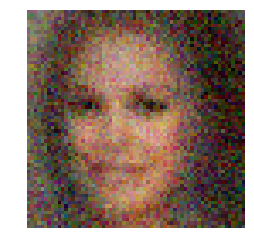

In [14]:
sample_Image_plot(sess, X_fake, Z)

## Load a pretrained MLP
You can train a model and change the parameters by running these two cell.

In [ ]:
tf.reset_default_graph()
#Placeholders
X = tf.placeholder(tf.float32,[None,64,64,3])
Z = tf.placeholder(tf.float32,[None,60])

#Model
X_fake = generator_mlp(Z)
true_data_logits = discriminator_mlp(X)
fake_data_logits = discriminator_mlp(X_fake, reuse=True)

#Loss functions
D_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=true_data_logits,labels=tf.ones_like(true_data_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_data_logits,labels=tf.zeros_like(fake_data_logits)))
G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_data_logits,labels=tf.ones_like(fake_data_logits)))

#Optimizers
G_variables = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="Generator")
D_variables = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="Discriminator")
G_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(G_loss,var_list = G_variables) # G Train step
D_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(D_loss,var_list = D_variables) # D Train step
saver = tf.train.Saver()
sess = tf.Session()
saver.restore(sess, "tmp/model_ckpt/mlp_female.ckpt")